# Data Mining Project
### Giorgio Donati, g.donati24@studenti.unipi.it
### Pietro Francaviglia, p.francaviglia1@studenti.unipi.it
#### A.Y. 2021-2022


## Libraries and datasets

In [5]:
from sklearn import tree

from t3_constants import *
from t3_utility import *

# Decision Tree
## Training

In [6]:
with open(f'{PICKLE_FOLDER}{TRAIN}{X}.pkl', 'rb') as f:
    train_x = pickle.load(f)
with open(f'{PICKLE_FOLDER}{TRAIN}{Y}.pkl', 'rb') as f:
    train_y = pickle.load(f)

x = train_x.values
y = train_y.values.ravel()

In [7]:
## Hyper-parameters grid search for Decision Tree

param_d = {
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease': [0, 1, 1e-1, 1e-2, 1e-3, 1e-4],
    'min_samples_leaf': [1, 3, 5]
}
combinations = itertools.product(*(param_d[key] for key in sorted(param_d)))

results = []

for criterion, min_impurity_decrease, min_samples_leaf in combinations:
    model = tree.DecisionTreeClassifier(
        criterion=criterion,
        min_impurity_decrease=min_impurity_decrease,
        min_samples_leaf=min_samples_leaf,
        random_state=0
    )
    mean_val_score, std_val_score = cross_validation_summary(model, x, y, 5)
    res = criterion, min_impurity_decrease, min_samples_leaf, mean_val_score, std_val_score
    results.append(res)

decision_tree_results_df = pd.DataFrame(results, columns=['criterion', 'min_impurity_decrease', 'min_samples_leaf', 'mean_val_score', 'std_val_score'])
decision_tree_results_df.sort_values('mean_val_score').tail(3)

,criterion,min_impurity_decrease,min_samples_leaf,mean_val_score,std_val_score
34,entropy,0.0001,3,0.809892,0.014803
31,entropy,0.0010,3,0.809892,0.014803
14,gini,0.0010,5,0.813016,0.029272


In [8]:
decision_tree_results_df.groupby('criterion').mean()

,min_impurity_decrease,min_samples_leaf,mean_val_score,std_val_score
criterion,,,,
entropy,0.185183,3.0,0.723599,0.020388
gini,0.185183,3.0,0.702642,0.028565


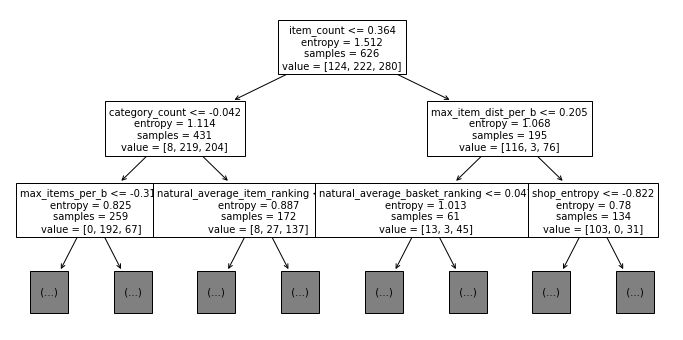

In [9]:
model = tree.DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.01, min_samples_leaf=1, random_state=0)
model.fit(x, y)
plt.figure(figsize=(12, 6))
tree.plot_tree(model, fontsize=10, max_depth=2, feature_names=train_x.columns)
plt.show()

In [10]:
pd.Series(model.feature_importances_, index = train_x.columns).sort_values()

avg_baskets_per_d                 0.009703
natural_average_price_ranking     0.025390
natural_average_basket_ranking    0.037060
price_entropy                     0.043328
category_entropy                  0.056419
natural_average_item_ranking      0.056506
shop_entropy                      0.057079
max_items_per_b                   0.085785
max_item_dist_per_b               0.098124
category_count                    0.171837
item_count                        0.358770
dtype: float64

## Testing

In [17]:
with open(f'{PICKLE_FOLDER}{TEST}{X}.pkl', 'rb') as f:
    test_x = pickle.load(f)
with open(f'{PICKLE_FOLDER}{TEST}{Y}.pkl', 'rb') as f:
    test_y = pickle.load(f)

In [28]:
best_result = decision_tree_results_df.sort_values('mean_val_score').tail(1)


In [32]:

from xgboost import train


model = tree.DecisionTreeClassifier(
        criterion=best_result['criterion'],
        min_impurity_decrease=best_result['min_impurity_decrease'],
        min_samples_leaf=best_result['min_samples_leaf'],
        random_state=0
    )
model.fit(x, y)

TypeError: 'numpy.ndarray' object is not callable